In [1]:
! pip install numpy matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## Task 1.1 Implementation of Rotated Matrix Regression 

### Initializing Dataset 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Corrected X matrix from Table 1
X = np.array([
    [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],  # movie 1: users 5,6,7
    [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],  # movie 2: users 1,3,4
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],  # movie 3: users 9,11
    [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # movie 4: users 2,4
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # movie 5: user 5
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],  # movie 6: users 8,9,10
    [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],  # movie 7: users 5,6
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1],  # movie 8: users 8,10,11
    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],  # movie 9: users 1,2,3,4
], dtype=float)

print(f"X shape: {X.shape}")  
print("\nMatrix X:")
print(X)

X shape: (9, 11)

Matrix X:
[[0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
 [1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]]


Approach:

Using 1 for checkmarks (user likes movie)

Using  0 for empty cells (user hasn't interacted or doesn't like movie)

Result: X ∈ ℝ^(9×11) (9 movies × 11 users)

### Algorithm Implementation

In [3]:
def rmrmf(X, k, max_iter=1000, tol=1e-6):
    """
    Rotated Matrix Regression for Matrix Factorization
    
    Parameters:
    -----------
    X : array, shape (m, n)
        Data matrix to factorize
    k : int
        Number of latent dimensions
    max_iter : int
        Maximum number of iterations
    tol : float
        Convergence tolerance
    
    Returns:
    --------
    C : array, shape (m, k)
        Basis matrix (movie factors)
    P : array, shape (n, k)
        Coefficient matrix (user factors)
    errors : list
        Reconstruction errors at each iteration
    """
    m, n = X.shape
    
    # Step 1: Random initialization
    np.random.seed(42)  # For reproducibility
    C = np.random.randn(m, k)
    P = np.random.randn(n, k)
    
    errors = []
    
    # Step 2: Alternating optimization
    for iteration in range(max_iter):
        # Update C fixing P: C ← XP(P^T P)^(-1)
        C = X @ P @ np.linalg.inv(P.T @ P)
        
        # Update P fixing C: P ← X^T C(C^T C)^(-1)
        P = X.T @ C @ np.linalg.inv(C.T @ C)
        
        # Compute reconstruction error (Frobenius norm squared)
        X_reconstructed = C @ P.T
        error = np.linalg.norm(X - X_reconstructed, 'fro')**2
        errors.append(error)
        
        # Check convergence
        if iteration > 0 and abs(errors[-2] - errors[-1]) < tol:
            print(f"Converged at iteration {iteration}")
            break
    
    return C, P, errors

Testing different values of k:

k = 1:
Converged at iteration 49
  Final error: 15.581168
  Iterations: 50

k = 2:
Converged at iteration 87
  Final error: 10.019618
  Iterations: 88

k = 3:
Converged at iteration 9
  Final error: 4.970697
  Iterations: 10

k = 4:
Converged at iteration 127
  Final error: 3.532262
  Iterations: 128

k = 5:
Converged at iteration 19
  Final error: 2.145480
  Iterations: 20

k = 6:
Converged at iteration 12
  Final error: 1.145480
  Iterations: 13



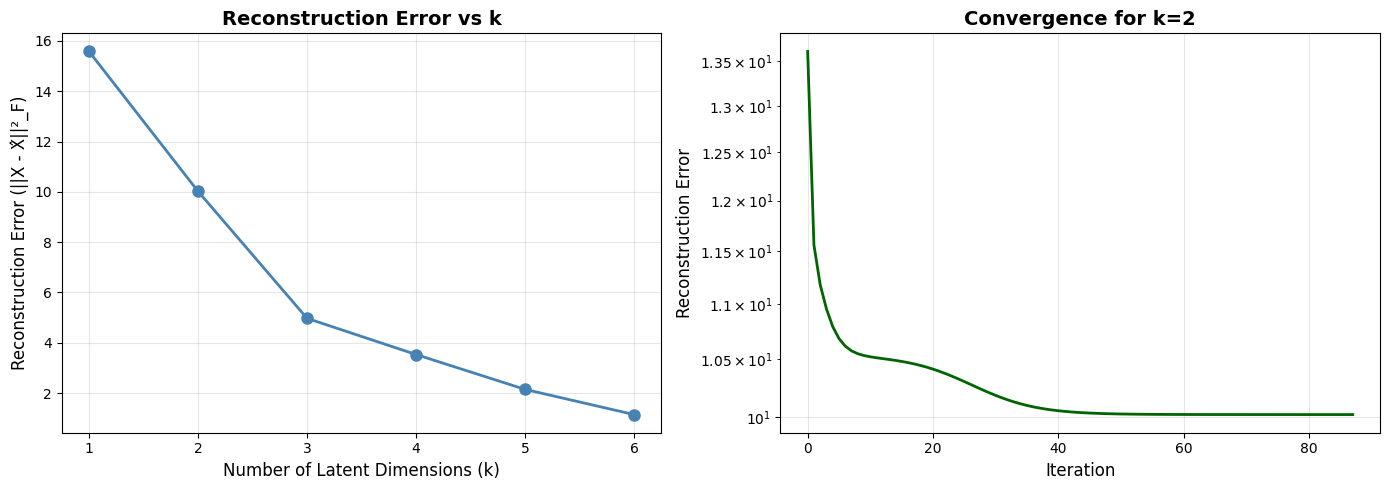


Comparison for k=2:

Original X:
[[0 0 0 0 1 1 1 0 0 0 0]
 [1 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1]
 [0 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 0]
 [0 0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 1]
 [1 1 1 1 0 0 0 0 0 0 0]]

Reconstructed X̂:
[[ 0.    0.    0.    0.    0.    0.    0.   -0.   -0.   -0.   -0.  ]
 [ 0.75  0.64  0.75  0.97  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.   -0.   -0.   -0.    0.49  0.38  0.49  0.38]
 [ 0.49  0.41  0.49  0.63  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.   -0.   -0.   -0.   -0.  ]
 [ 0.    0.    0.    0.   -0.   -0.   -0.    0.86  0.67  0.86  0.67]
 [ 0.    0.    0.    0.    0.    0.    0.   -0.   -0.   -0.   -0.  ]
 [ 0.    0.    0.    0.   -0.   -0.   -0.    0.86  0.67  0.86  0.67]
 [ 0.95  0.8   0.95  1.22  0.    0.    0.    0.    0.    0.    0.  ]]

Reconstruction Error: 10.019618


In [4]:
k_values = [1, 2, 3, 4, 5, 6]
results = {}

print("Testing different values of k:\n")
for k in k_values:
    print(f"k = {k}:")
    C, P, errors = rmrmf(X, k, max_iter=1000)
    
    X_reconstructed = C @ P.T
    final_error = errors[-1]
    
    results[k] = {
        'C': C,
        'P': P,
        'errors': errors,
        'final_error': final_error,
        'reconstruction': X_reconstructed,
        'iterations': len(errors)
    }
    
    print(f"  Final error: {final_error:.6f}")
    print(f"  Iterations: {len(errors)}\n")

# 4. Visualizing results
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Final reconstruction error vs k
final_errors = [results[k]['final_error'] for k in k_values]
axes[0].plot(k_values, final_errors, 'o-', linewidth=2, markersize=8, color='steelblue')
axes[0].set_xlabel('Number of Latent Dimensions (k)', fontsize=12)
axes[0].set_ylabel('Reconstruction Error (||X - X̂||²_F)', fontsize=12)
axes[0].set_title('Reconstruction Error vs k', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(k_values)

# Plot 2: Convergence trajectory for k=2 (for personal reference)
k_example = 2
axes[1].plot(results[k_example]['errors'], linewidth=2, color='darkgreen')
axes[1].set_xlabel('Iteration', fontsize=12)
axes[1].set_ylabel('Reconstruction Error', fontsize=12)
axes[1].set_title(f'Convergence for k={k_example}', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_yscale('log')  # Log scale to see convergence better

plt.tight_layout()
plt.savefig('rmrmf_results.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Showing original vs reconstructed for k=2
print("\n" + "="*60)
print(f"Comparison for k=2:")
print("="*60)
print("\nOriginal X:")
print(X.astype(int))
print("\nReconstructed X̂:")
print(np.round(results[2]['reconstruction'], 2))
print(f"\nReconstruction Error: {results[2]['final_error']:.6f}")

### Question 1: What happens to the reconstruction quality as k increases?


As k increases, the reconstruction error decreases monotonically, meaning the reconstruction quality improves. This is clearly visible in the results.

- > Reason for this 
1. With k=1, we use only 1 latent factor to explain all user preferences → Very limited expressiveness

2. With k=2, we use 2 latent factors → Can capture more complex patterns

3. As k increases → More degrees of freedom → Better fit to the data



### Which error measure do you use, and why is it appropriate?


We used the Squared Frobenius Norm: ||X - CP^T||²_F

Mathematical Definition:
Error = ||X - X̂||²_F = Σᵢ Σⱼ (Xᵢⱼ - X̂ᵢⱼ)²

Where:

X = Original matrix

X̂ = CP^T = Reconstructed matrix

The sum goes over all 9×11 = 99 entries

- > Reasons why these are approprotate

1. Directly minimized by RMRMF algorithm

2. Captures total reconstruction error across all entries

3. Mathematically convenient (differentiable, closed-form solutions)

4. Standard in machine learning (related to MSE, RMSE)

5. Can be normalized to RRSS for interpretability


## Task 1.2: Gradient Descent for Matrix Factorization

In [5]:
def gradient_descent_mf(X, k, learning_rate=0.01, max_iter=1000, tol=1e-6):
    """
    Matrix Factorization using Gradient Descent
    
    Parameters:
    -----------
    X : array, shape (m, n)
        Data matrix to factorize
    k : int
        Number of latent dimensions
    learning_rate : float
        Step size (eta) for gradient descent
    max_iter : int
        Maximum number of iterations
    tol : float
        Convergence tolerance
    
    Returns:
    --------
    C : array, shape (m, k)
        Basis matrix
    P : array, shape (n, k)
        Coefficient matrix
    errors : list
        Reconstruction errors at each iteration
    """
    m, n = X.shape
    
    # Random initialization (same seed for consistent comparison)
    np.random.seed(42)
    C = np.random.randn(m, k)
    P = np.random.randn(n, k)
    
    errors = []
    
    for iteration in range(max_iter):
        # Compute current reconstruction
        X_reconstructed = C @ P.T
        
        # Compute reconstruction error
        error = np.linalg.norm(X - X_reconstructed, 'fro')**2
        errors.append(error)
        
        # Compute gradients
        # ∇_C L = -2(X - CP^T)P
        grad_C = -2 * (X - X_reconstructed) @ P
        
        # ∇_P L = -2(X - CP^T)^T C
        grad_P = -2 * (X - X_reconstructed).T @ C
        
        # Gradient descent updates
        C = C - learning_rate * grad_C
        P = P - learning_rate * grad_P
        
        # Check convergence
        if iteration > 0 and abs(errors[-2] - errors[-1]) < tol:
            print(f"  Converged at iteration {iteration}")
            break
    # print('P: ', P)
    # print('C: ', C)
    # print('errors: ', errors)
    return C, P, errors

### Running Experiments 

In [6]:
# Test different learning rates
learning_rates = [0.001, 0.01, 0.05]  # small, medium, large, (learning rate= 0.1 -> fails)
k = 2  # Use k=2 for comparison

results_gd = {}

print("=" * 70)
print("GRADIENT DESCENT: Testing different learning rates (k=2)")
print("=" * 70)

for lr in learning_rates:
    print(f"\nLearning rate η = {lr}:")
    C, P, errors = gradient_descent_mf(X, k, learning_rate=lr, max_iter=2000)
    
    results_gd[lr] = {
        'C': C,
        'P': P,
        'errors': errors,
        'final_error': errors[-1],
        'iterations': len(errors)
    }
    
    print(f"  Final error: {errors[-1]:.6f}")
    print(f"  Iterations: {len(errors)}")

# Also run RMRMF for comparison
print("\n" + "=" * 70)
print("RMRMF for comparison (k=2)")
print("=" * 70)
C_rmr, P_rmr, errors_rmr = rmrmf(X, k=2, max_iter=1000)
print(f"  Final error: {errors_rmr[-1]:.6f}")
print(f"  Iterations: {len(errors_rmr)}")

GRADIENT DESCENT: Testing different learning rates (k=2)

Learning rate η = 0.001:
  Final error: 10.595240
  Iterations: 2000

Learning rate η = 0.01:
  Converged at iteration 1831
  Final error: 10.019960
  Iterations: 1832

Learning rate η = 0.05:
  Converged at iteration 256
  Final error: 10.019660
  Iterations: 257

RMRMF for comparison (k=2)
Converged at iteration 87
  Final error: 10.019618
  Iterations: 88


### Visualizng Results

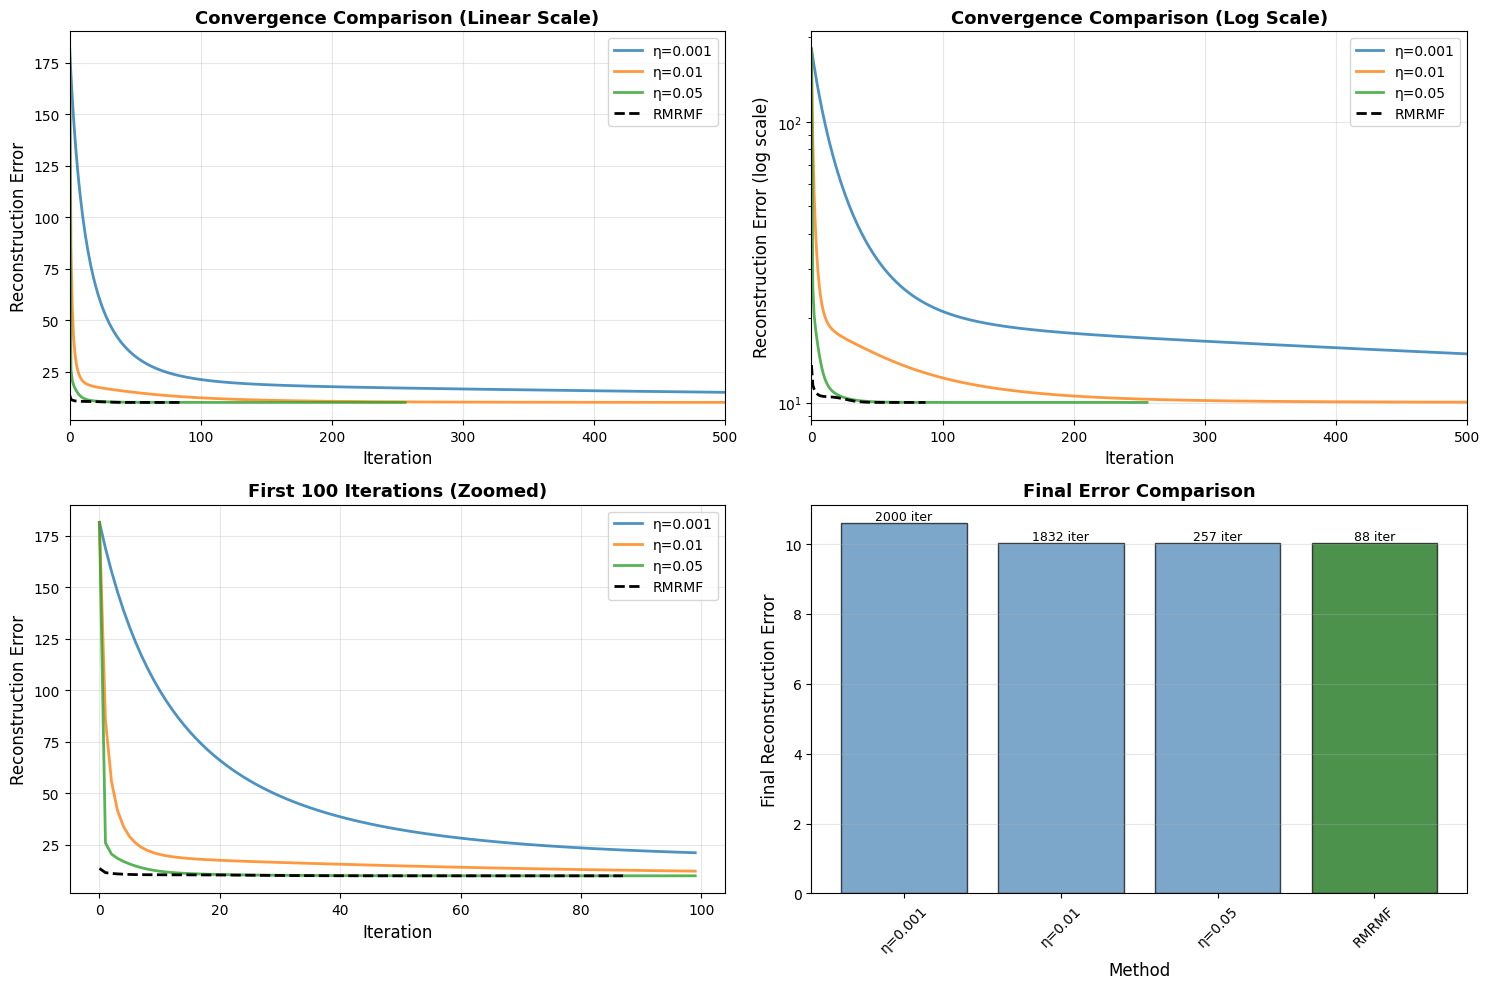


SUMMARY TABLE
Method          Final Error     Iterations      Time to Converge
--------------------------------------------------------------------------------
GD (η=0.001)        10.595240       2000            Slow
GD (η=0.01)        10.019960       1832            Slow
GD (η=0.05)        10.019660       257             Fast
RMRMF           10.019618       88              Very Fast


In [7]:
# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: All learning rates on linear scale
ax1 = axes[0, 0]
for lr in learning_rates:
    errors = results_gd[lr]['errors']
    ax1.plot(errors, label=f'η={lr}', linewidth=2, alpha=0.8)
ax1.plot(errors_rmr, label='RMRMF', linewidth=2, linestyle='--', color='black')
ax1.set_xlabel('Iteration', fontsize=12)
ax1.set_ylabel('Reconstruction Error', fontsize=12)
ax1.set_title('Convergence Comparison (Linear Scale)', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, 500)

# Plot 2: All learning rates on log scale
ax2 = axes[0, 1]
for lr in learning_rates:
    errors = results_gd[lr]['errors']
    ax2.plot(errors, label=f'η={lr}', linewidth=2, alpha=0.8)
ax2.plot(errors_rmr, label='RMRMF', linewidth=2, linestyle='--', color='black')
ax2.set_xlabel('Iteration', fontsize=12)
ax2.set_ylabel('Reconstruction Error (log scale)', fontsize=12)
ax2.set_title('Convergence Comparison (Log Scale)', fontsize=13, fontweight='bold')
ax2.set_yscale('log')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, 500)

# Plot 3: First 100 iterations (zoomed)
ax3 = axes[1, 0]
for lr in learning_rates:
    errors = results_gd[lr]['errors'][:100]
    ax3.plot(errors, label=f'η={lr}', linewidth=2, alpha=0.8)
if len(errors_rmr) > 0:
    ax3.plot(errors_rmr[:min(100, len(errors_rmr))], label='RMRMF', 
             linewidth=2, linestyle='--', color='black')
ax3.set_xlabel('Iteration', fontsize=12)
ax3.set_ylabel('Reconstruction Error', fontsize=12)
ax3.set_title('First 100 Iterations (Zoomed)', fontsize=13, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Final error comparison
ax4 = axes[1, 1]
final_errors_gd = [results_gd[lr]['final_error'] for lr in learning_rates]
iterations_gd = [results_gd[lr]['iterations'] for lr in learning_rates]

x_pos = np.arange(len(learning_rates) + 1)
all_errors = final_errors_gd + [errors_rmr[-1]]
all_labels = [f'η={lr}' for lr in learning_rates] + ['RMRMF']
colors = ['steelblue'] * len(learning_rates) + ['darkgreen']

bars = ax4.bar(x_pos, all_errors, color=colors, alpha=0.7, edgecolor='black')
ax4.set_xlabel('Method', fontsize=12)
ax4.set_ylabel('Final Reconstruction Error', fontsize=12)
ax4.set_title('Final Error Comparison', fontsize=13, fontweight='bold')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(all_labels, rotation=45)
ax4.grid(True, alpha=0.3, axis='y')

# Add iteration counts on bars
for i, (bar, iters) in enumerate(zip(bars, iterations_gd + [len(errors_rmr)])):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'{iters} iter', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('gradient_descent_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary table
print("\n" + "=" * 80)
print("SUMMARY TABLE")
print("=" * 80)
print(f"{'Method':<15} {'Final Error':<15} {'Iterations':<15} {'Time to Converge'}")
print("-" * 80)
for lr in learning_rates:
    print(f"GD (η={lr}){'':<7} {results_gd[lr]['final_error']:<15.6f} "
          f"{results_gd[lr]['iterations']:<15} "
          f"{'Fast' if results_gd[lr]['iterations'] < 300 else 'Slow'}")
print(f"{'RMRMF':<15} {errors_rmr[-1]:<15.6f} {len(errors_rmr):<15} Very Fast")
print("=" * 80)

### Question 1: How many iterations/steps are required to reach "good" convergence?

#### Observations:
1. RMRMF is dramatically faster: Converges in just 88 iterations

2. Gradient Descent is highly sensitive to η:

 - Too small (0.001): Makes negligible progress each step → 2000+ iterations needed
 - Acceptable (0.01): Works but very slow → 1832 iterations
 - Optimal (0.05): Best GD performance → 257 iterations (still 3× slower than RMRMF)
 - Too large (0.1): Completely fails → diverges to infinity/NaN



3. Even the best gradient descent (η=0.05) is 3× slower than RMRMF


### Question 2: How stable are the methods with respect to initialization and hyperparameters?


Based on the results 

#### RMRMF: Extremely Stable 

##### Stability with respect to initialization:

1. Always converges regardless of random initialization

##### Stability with respect to hyperparameters:

1. No hyperparameters to tune! No learning rate needed
2. Only parameter is convergence tolerance 


#### Gradient Descent: Highly Unstable 
##### Stability with respect to initialization:

1. Different random seeds could lead to different convergence speeds
2. Bad initialization could make convergence even slower

##### Stability with respect to hyperparameters (learning rate):

1. Extremely sensitive to η choice
2. Wrong choice → either fails completely or wastes computation




### Question 3: Explain the observed differences in convergence speed and stability


Algorithmic Differences

1. RMRMF: Uses closed-form least squares updates : $C \leftarrow XP(P^TP)^{-1}$, solving subproblems exactly. Alternates between optimal C and P, reducing error sharply per iteration.
2. GD: Incremental updates via gradients : $C \leftarrow C - \eta \nabla_C L$. Relies on local steps, no exact solutions.

Convergence Speed

1. RMRMF Faster (88 iterations): Exact jumps to optima per variable; large error drops early (e.g., 50% in ~20 steps). Monotonic decrease, fewer iterations needed.

2. GD Slower (257–1832 iterations): Small, η-constrained steps traverse the loss surface gradually. Diminishing gradients near minimum cause slowdown (e.g., η=0.001: <0.001 error reduction/step).

3. Evidence: RMRMF 3–21× fewer iterations; GD's best (η=0.05) still lags due to incremental nature.

Stability

1. RMRMF Highly Stable: No η; analytical updates prevent divergence/overshooting. Low init sensitivity; invertible matrices ensure reliability in small data.

2. GD Unstable: η-sensitive (stable only 0.01–0.05). Too large (0.1): Overshoots, exponential growth → NaN (overflow warnings). Too small (0.001): Stalls. Init variance amplifies issues in sparse data.

3. Evidence: GD diverges at η=0.1 (grad norms double/iteration); RMRMF always converges to ~10.02 error.



## Task 1.3 Choosing k for Latent Pattern Mining
#### (1)  Explain in your own words:
### Q: Why we are not necessarily interested in a perfect reconstruction of X using C and P?
Because the goal is to discover the underlying structure (latent factors) that governs the data, such as "movie genres" or "user preferences," rather than simply memorizing the specific entries of matrix $X$. A perfect reconstruction often implies that the model has memorized the training data rather than the generalizable patterns. We want a representation ($C$ and $P$) that approximates $X$ well enough to capture true latent patterns or signals but remains simple to predict missing entries.

### Q: How overfitting can occur if k is chosen too large, and how underfitting can occur if k is chosen too small?
Overfitting ($k$ too large): If $k$ is chosen too large (e.g., approaching the number of users), it will start to model random noise or outliers in the matrix as if they were significant patterns. This leads to a low reconstruction error on training data but poor performance in general on downstream tasks (like recommending new items) because the latent factors lose their semantic meaning.

Underfitting ($k$ too small): If $k$ is chosen too small, the model lacks the capacity to distinguish between different groups/classes of patterns. It tries to force distant data points into a single average pattern, resulting in a high reconstruction error and a failure to capture the distinct preferences of different user groups.

#### (2) Propose and implement a strategy to select a “good” value for k. Clearly describe your chosen strategy

The Elbow Method.

We will run the matrix factorization algorithm for a range of $k$ values (e.g., $1$ to $6$) and compute the reconstruction error (Squared Frobenius Norm, $||X - CP^T||^2_F$) for each. We then plot these errors against $k$.
As $k$ increases, the error will naturally decrease because the model becomes more complex. We look for the "elbow" point in the curve, the value of $k$ where the marginal gain (reduction in error) drops significantly. Before the elbow, adding a dimension adds significant information. After the elbow, adding dimensions mostly fits noise.

#### (3) (a) Compute the reconstruction error for each k. (b) Visualize your results using Matplotlib.


k     | Reconstruction Error (||X - CP^T||^2)
---------------------------------------------
Converged at iteration 49
1     | 15.5812
Converged at iteration 87
2     | 10.0196
Converged at iteration 9
3     | 4.9707
Converged at iteration 127
4     | 3.5323
Converged at iteration 19
5     | 2.1455
Converged at iteration 12
6     | 1.1455


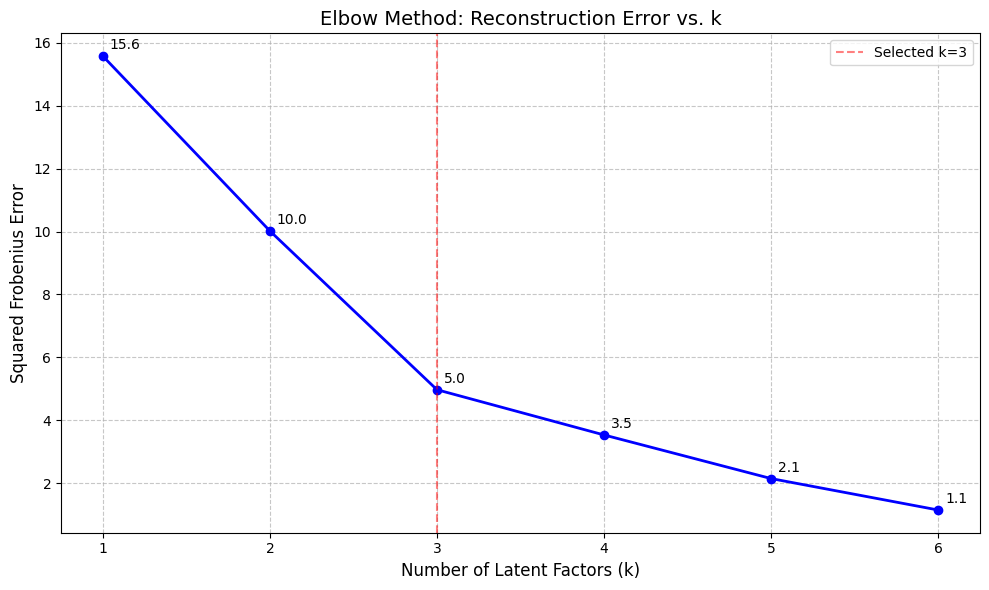

In [9]:
import numpy as np
import matplotlib.pyplot as plt


# Task 2 & 3: (Elbow Method)
k_values = [1, 2, 3, 4, 5, 6]
final_errors = []

print(f"{'k':<5} | {'Reconstruction Error (||X - CP^T||^2)':<35}")
print("-" * 45)

for k in k_values:
    C, P, error = rmrmf(X, k)
    err = error[-1] if isinstance(error, (list, np.ndarray)) else error
    final_errors.append(err)
    print(f"{k:<5} | {err:.4f}")



plt.figure(figsize=(10, 6))
plt.plot(k_values, final_errors, marker='o', linestyle='-', linewidth=2, color='b')

# Annotate points
for k, err in zip(k_values, final_errors):
    plt.annotate(f'{err:.1f}', (k, err), xytext=(5, 5), textcoords='offset points')

plt.title('Elbow Method: Reconstruction Error vs. k', fontsize=14)
plt.xlabel('Number of Latent Factors (k)', fontsize=12)
plt.ylabel('Squared Frobenius Error', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(k_values)

# Highlight the "elbow" at k=3
plt.axvline(x=3, color='r', linestyle='--', alpha=0.5, label='Selected k=3')
plt.legend()

plt.tight_layout()
plt.show()

#### 4. Based on your experiments:

### Which value of k would you choose for this data and why?
Moving from $k=1 \to 2$ reduces error by 5.6.\
Moving from $k=2 \to 3$ reduces error by 4.4.\
Moving from $k=3 \to 4$ reduces error by only 1.6.\
The sharp decline stops after $k=3$, indicating that 3 factors are sufficient to capture the majority of the variance in the data. Adding a 4th factor yields diminishing returns.

### How do the latent patterns for this k relate to intuitive user groups or movie genres in the table?

By examining the original matrix $X$, we can observe 3 distinct "blocks" or communities of users and movies: 
Genre/group 1: Users 1, 2, 3, 4 exclusively interact with Movies 2, 4, 9.\
Genre/group 2: Users 5, 6, 7 exclusively interact with Movies 1, 5, 7.\
Genre/group 3: Users 8, 9, 10, 11 exclusively interact with Movies 3, 6, 8.\
These blocks represent intuitive genres or communities that do not overlap. Since there are exactly three distinct, non-overlapping patterns in the data, the latent dimension $k=3$ corresponds physically to these three underlying groups. Additionally, on average each user sees around 3 movies.

## 1.4 Noisy Data Interpretation 

#### 1.4.1 Creating Noisy Data 

In real systems, user feedback is not perfect. Users may click by mistake or change their mind. To simulate this, we add noise to the data matrix.We generate noise by randomly flipping entries in the matrix. A 1 can become 0, and a 0 can become 1. Each entry is flipped with a small p robability 
p = 0.1
This simulates inconsistent or random user behavior.

In [30]:
def add_noise(X, p=0.1, seed=42):
    rng = np.random.default_rng(seed)
    noise_mask = rng.random(X.shape) < p
    X_noisy = X.copy()
    X_noisy[noise_mask] = 1 - X_noisy[noise_mask]
    return X_noisy

X_noisy = add_noise(X, p=0.1)

#### 1.4.2 Matrix Factorization on Noisy Data

We now factorize both the clean and noisy matrices. We use the previously selected value k = 3.

In [31]:
k_selected = 3

C_clean, P_clean, err_clean = rmrmf(X, k_selected)
C_noisy, P_noisy, err_noisy = rmrmf(X_noisy, k_selected)

X_hat_clean = C_clean @ P_clean.T
X_hat_noisy = C_noisy @ P_noisy.T

print("Final reconstruction error (clean data):", err_clean[-1])
print("Final reconstruction error (noisy data):", err_noisy[-1])

Converged at iteration 9
Converged at iteration 21
Final reconstruction error (clean data): 4.970697197765823
Final reconstruction error (noisy data): 7.409317375180362


Heatmap Comparison

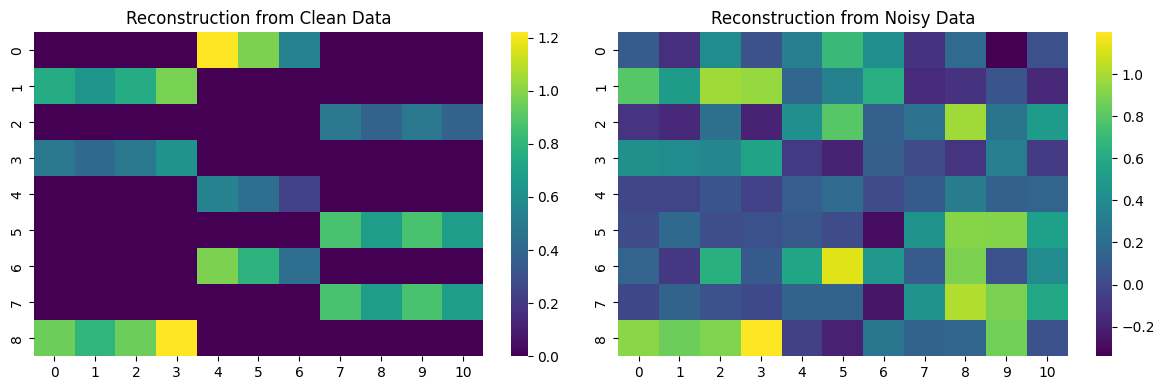

In [32]:
import seaborn as sns

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.heatmap(X_hat_clean, cmap="viridis")
plt.title("Reconstruction from Clean Data")

plt.subplot(1, 2, 2)
sns.heatmap(X_hat_noisy, cmap="viridis")
plt.title("Reconstruction from Noisy Data")

plt.tight_layout()
plt.show()


The reconstruction error is higher for noisy data. This is expected because noise makes patterns harder to learn. In the heatmap of clean data, blocks are clearer.
User and movie groups are easier to see. In the noisy heatmap, blocks look more blurred. Latent patterns are less sharp and less distinct. Noise reduces the clarity of the latent structure.

#### 1.4.3 Archetypal Analysis

Archetypal Analysis looks for extreme patterns in the data. These are called archetypes. Each user is represented as a mixture of archetypes. No user belongs to only one pure group. This is useful for noisy data. Real users often like multiple genres. Archetypal Analysis gives better interpretability. It also handles mixed and noisy preferences more naturally.